# Capstone proposal by Mirko Salomon 

# BEVERAGE MACHINE CHURN PREDICTION

* ## [1) Machine Learning Introduction](#MLIntro) 

    * 
        #### Intended outcome
        
        #### Type of problem
        
        #### Features
        
        #### Model Priority
        
* ## [2) Strategy](#Strat) 
    
    *  
    
        #### Scoring : How to measure efficiency
        
        
* ## [3) Data preparation](#DataPrep)    
    
    *  
    
        #### Standard preprocessing steps for all models
        
        #### Train, Validation and Test data
        
        
* ## [4) Baseline](#Baseline)    
    
    *  
    
        #### Train Gaussian Naive Base model
        
        #### Test results
        
        #### Dummy Classifier
        
        #### Confusion Matrix

* ## [5) Feature importance](#FeaureImp)   

    *  
    
        #### Limitations

## 1) Machine Learning Introduction<a class="anchor" id="MLIntro"></a>

### Intended outcome

I want to use a score that has a good balance and reduces the error of predicting churn when the machine has not churned and predicting no churn when the machine does churn.

The score will check if we classified correctly if a machine has churned or not.

The intended outcome is to predict the probabilities of a given machine to Churn, so at the end we will extract the probability of each machine to churn

### Type of problem

Classification is the task of predicting a discrete class label.

Regression is the task of predicting a continuous quantity.

The model is based on predicting a class label and I would like to predict the probability of a class to Churn.

We are closer to a classification process.

In [1]:
import numpy as np

import pandas as pd

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import os

# Import seaborn
import seaborn as sns

# Specify the file path
file_path = r'C:\Users\msalomo\OneDrive - NESTLE\Certificate Machine Learning and Data\Churn Project\Notebook output'

pip install -U scikit-learn scipy matplotlib

In [2]:
#libraries
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.model_selection import ParameterGrid

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

### Features

In [3]:
# Specify the filename
filename = 'BM_all2.p'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Load the pickle file
with open(file_path_with_filename, 'rb') as file:
    BM_all2 = pickle.load(file)

In [4]:
BM_all2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252265 entries, 0 to 252264
Columns: 149 entries, Serial ID to Actions_tagging update
dtypes: bool(1), datetime64[ns](2), float64(103), int32(2), int64(3), object(38)
memory usage: 285.1+ MB


In [5]:
BM_all2.head()

,Serial ID,Sales Organisation,Machine Status Groupings,User Status,TA Contract Installation Date,Depreciation Start,Manufacturer Number,Position,TA Contract Start Date,TA Contract End Date,...,Actions_Removed,Actions_Reviewed and no action Required,Actions_Reviewed and no actions required,Actions_Seasonal Machine,Actions_Telemetry installed,Actions_Upgrade machine installed,Actions_Visit completed,Actions_Visit/Call planned,Actions_removed,Actions_tagging update
0,TH10127992,Thailand,Deployed,Installed,1924.0,5325.0,T136295,#,1897.0,355.683599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TH10213045,Thailand,Deployed,Installed,1924.0,2131.0,180202-0087,#,1897.0,355.683599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TH10212610,Thailand,Deployed,Installed,1924.0,2314.0,171006-0034,#,1897.0,355.683599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TH10213000,Thailand,Deployed,Installed,1924.0,2131.0,180202-0042,#,1897.0,355.683599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TH10108148,Thailand,Deployed,Installed,1924.0,6161.0,T056224,#,1897.0,355.683599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
BM_all2.columns

Index(['Serial ID', 'Sales Organisation', 'Machine Status Groupings',
       'User Status', 'TA Contract Installation Date', 'Depreciation Start',
       'Manufacturer Number', 'Position', 'TA Contract Start Date',
       'TA Contract End Date',
       ...
       'Actions_Removed', 'Actions_Reviewed and no action Required',
       'Actions_Reviewed and no actions required', 'Actions_Seasonal Machine',
       'Actions_Telemetry installed', 'Actions_Upgrade machine installed',
       'Actions_Visit completed', 'Actions_Visit/Call planned',
       'Actions_removed', 'Actions_tagging update'],
      dtype='object', length=149)

Features :

    Type Categorical :
        'Sales Organisation', 
        'Machine Status Groupings',
        'User Status', 
        'Manufacturer Number', 
        'Position', 
        'TA Usage Indicator',
        'Account ABC Classification (Account ID)', 
        'Industry (Account ID)',
        'Industry Code 1 (Account ID)', 
        'Account ABC Classification (EC ID)',
        'Industry (EC ID)', 
        'Industry Code 1 (EC ID)',
        'Parent Installation Point ID',
        'Registered Product Category (Registered Product ID)', 
        'Model',
        'Model Vendor', 
        'Model Category', 
        'Model Group', 
        'Beverage Temperature',
        'System Brands', 
        'Ingredient Format', 
        'Machine Type', 
        'Positionning',
        'Generation', 
        'Blueprint Throughput', 
        'IP Ownership', 
        'Trading Partner',
        'G/R/M TB'
        
     Type Integer :
        'TA Contract Installation Date',
        'Depreciation Start',
        'TA Contract Start Date',
        'TA Contract End Date',
       
     Not used : 
        'Serial ID', 'Calendar Date', 'EC ID'
       
Target :

     Type Binary:
        'Churn'

4 features have a date columns, the target is binary and the other features are categorical

### Model Priority

I am using the flowchart from Scikit Learn designed to give a bit of a rough guide on how 
to approach problems with regard to which estimators to try on your data :

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

As I am predicting a Category and we have labeled data and less than 100k samples 
I should try Kneighbors Classifier and Ensemble Classifiers

#### Priority :
##### Logistic regression
Gives predictions using a logistic function to find the dependency between the output and input variables
used to model the probability of a certain class or event existing

It can be explained and understand more easily than other models, model coefficients can be interpreted as indicators of feature importance

I want to find a prediction and the Logistic regression model can return a prediction and is effective for binary classification tasks

I can modify the weights in order to improve the model performance for imbalanced data. The logistic regression is sensitive to scale

I would have at least a version using regression.


##### KNeighbors

Based on the flowchart from Scikit Learn I should try it.

Kneighbors is easy to understand and interpret, it does not requires a lot of training and is fast to implement.

Since the algorithm requires no training before making predictions, new data can be added seamlessly.
The two main parameters to tune are the number of neighbors and the distance (e.g. Euclidean or Manhattan etc.)

It might not have the best performance with large number of dimensions and with categorical features, it becomes difficult for the algorithm to calculate distance in each dimension.


##### Decision Tree

Based on the flowchart from Scikit Learn I should try it.

Can be explained and easily visualized.

It can help to understand and works with categorical features.

It can predict probability, features that are not really important will not influence a lot the results and multicollinearity is not a problem.

I will use graphviz which brings nice visuals.

I will tune the depth of the tree and the minimum sample per split.
I might use the both gini and entropy to measure the quality of a split and  both strategy for the split at each node ('best', 'random')


##### Random Forest

Based on the flowchart from Scikit Learn I should try it.

Is a little bit more a black box than a regression.

Predicts class probabilities, can handle well categorical features and maintains accuracy when the data is missing

Seems to have good Performance on Imbalanced datasets.

Is a model working differently than a regression model and performs usually better than a decision tree

I will tune the number of estimators and the maximum number of features. I will also tune the class weigth and the bootstrap.



##### XGBoost
It is more of a black box I will used it only if the results are better

Can predict class probabilities and it seems to have good model performance (wins most of the Kaggle competitions)

I can easily fine tune and modify the model and it is different than other more basic model.


##### Optional :

None

##### Nice to add :
##### Cnn
Is more of a black box I will try it only if the results of the other models are really bad

It is adding some complexity and it is maybe not the most suitable in our case.

A unique model.



##### Not used :

##### SVM 

Problems that can be solved using SVM
Image classification
Recognizing handwriting
Caner detection

SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables.

Generally, it is usually advisable to first try to use logistic regression to see how the model does, if it fails then you can try using SVM without a kernel.
Source : https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=SVM%20tries%20to%20finds%20the,are%20near%20the%20optimal%20point.

## 2) Strategy <a class="anchor" id="Strat"></a>

'Machine Status Groupings' will be removed from the features as discussed in EDA

Some Markets have only one month of data so no churn can be detected, we will need to wait at least one more month for this data to be useful. We will keep only the Sales Organisation with more than one month of data.


Methodologies used to train the models :

    I will split my data in a stratified fashion between Training and Test data
    I split the Test data to have 20% of the data and then I will split the rest between Train data (0.8 * 0.7 = 56%) and validation data(0.8 * 0.3 = 24%)

I want to have enough training data in order to get a good model to fine tune that is not depending too much on the data.

I have a lot of data so in order to improve the speed of the calculation I will not use a k-fold method

### Scoring : How to measure efficiency

I will use the F-measure to measure the efficiency of our model

F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.
https://en.wikipedia.org/wiki/F-score

The final score is obtained by micro-averaging (biased by class frequency) or macro-averaging (taking all classes as equally important). 

The "Churn" = 'True' is currently the minority class and the more important because we want to identify the machines churning.

I prefer macro-F1 score because it is the harmonized mean and it gives more importance to the minority class 'churn’. I want to give more importance in identifying churned machine correctly.

Classifying a churned machine as not churned is a bit worse than classifying a non churned machine as churned, and this should be reflected in the way we select the best classifier.

When averaging the macro-F1, we gave equal weights to each class. As churned machine is the minority it would put more weights in the minority class than averaging with micro-F1 which would average the proportion of correctly classified test data out of all the test data.

I prefer f1_macro score because it is the harmonized mean giving more importance to the minority class 'churn'

F1_Score = 2*(Precision * Recall) / (Precision + Recall)

Macro-F1 = (F1_Score_True + F1_Score_False) / 2

I will also calculate the accuracy and the confusion matrix in order to understand better the model and in case F-Score is really close between two models I might have a look at the accuracy to decide which model is the best.

## 3) Data preparation<a class="anchor" id="DataPrep"></a>

SO = ['jp jpppp spzrs',  'prstzr nk', 'prstzr pnstrpzcp ztd', 'prstzr prw zrpzppd', 'ppkcstpp']

BM_noTickets2 =  pd.DataFrame([])

for i in SO:
    BM_noTickets2 =BM_noTickets2.append(BM_noTickets.loc[BM_noTickets['Sales Organisation'] == i])
BM_noTickets2.head()

# Save the BM_noTickets2 into pickle file BM_noTickets22
with open('BM_noTicketsWOSO.p', 'wb') as file:
    pickle.dump(BM_noTickets2, file)

### Standard preprocessing steps for all models

In [7]:
# Index
Index = ['Serial ID']
    
# Ordinal features    
date_vars = ['TA Contract Installation Date', 'Depreciation Start', 'TA Contract Start Date', 
                 'TA Contract End Date']


def preprocess_f(df):
    # Work on a copy
    df = df.copy()
        
    nomi_vars = ['Sales Organisation', 'User Status', 'Position', 'TA Usage Indicator',
                 'Account ABC Classification (Account ID)', 'Industry (Account ID)', 
                 'Industry Code 1 (Account ID)', 'Account ABC Classification (EC ID)', 'Industry (EC ID)', 
                 'Industry Code 1 (EC ID)',
                 'Registered Product Category (Registered Product ID)', 'Model', 'Model Vendor', 'Model Category',
                 'Model Group', 'Beverage Temperature', 'System Brands', 'Ingredient Format', 'Machine Type',
                 'Positionning', 'Generation', 'Blueprint Throughput', 'IP Ownership']
                 #'Positionning', 'Generation', 'Blueprint Throughput', 'IP Ownership', 'Trading Partner']
                
    # Some columns could be also ordinal features but we will keep them as nominal features for the moment
    ##ordi_vars = ['Positionning', 'Generation',]
    
    dummy_columns = nomi_vars
        
    df = pd.get_dummies(df, columns=dummy_columns)

    return df

BM_noTickets_preprocess = preprocess_f(BM_all2)

In [8]:
BM_noTickets_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252265 entries, 0 to 252264
Columns: 1402 entries, Serial ID to IP Ownership_Proprietary
dtypes: bool(1), datetime64[ns](2), float64(103), int32(2), int64(3), object(15), uint8(1276)
memory usage: 547.8+ MB


In [9]:
BM_noTickets_preprocess.head()

,Serial ID,Machine Status Groupings,TA Contract Installation Date,Depreciation Start,Manufacturer Number,TA Contract Start Date,TA Contract End Date,Account ID,EC ID,EC Name,...,Generation_Gen. 2,Generation_Legacy,Blueprint Throughput_%23-N/A,Blueprint Throughput_High,Blueprint Throughput_Low,Blueprint Throughput_Medium,IP Ownership_Exclusive,IP Ownership_Non-Proprietary,IP Ownership_Propr. Comp.,IP Ownership_Proprietary
0,TH10127992,Deployed,1924.0,5325.0,T136295,1897.0,355.683599,2790245,4082354.0,Big C Supercenter Plc.,...,0,0,0,0,0,1,0,0,0,1
1,TH10213045,Deployed,1924.0,2131.0,180202-0087,1897.0,355.683599,2564681,4081575.0,บมจ. มาสด้า ชลบุรี สาขาอมตะ,...,0,0,0,0,0,1,0,0,1,0
2,TH10212610,Deployed,1924.0,2314.0,171006-0034,1897.0,355.683599,2786575,4085549.0,บริษัท โตโยต้าภูมิใจคุณวาสี จำกัด,...,0,0,0,0,0,1,0,0,1,0
3,TH10213000,Deployed,1924.0,2131.0,180202-0042,1897.0,355.683599,2564672,4082515.0,บริษัท แคทเธอร์พิลลาร์ (ประเทศไทย) จำกัด,...,0,0,0,0,0,1,0,0,1,0
4,TH10108148,Deployed,1924.0,6161.0,T056224,1897.0,355.683599,2638523,4084568.0,ศูนย์อาหารอิมพีเรียลลาดพร้าว,...,0,1,0,0,0,1,0,1,0,0


In [10]:
BM_noTickets_preprocess.columns[300:400]

Index(['Industry Code 1 (Account ID)_020603 Street Ice Cream',
       'Industry Code 1 (Account ID)_030102 Cakes or Patisserie',
       'Industry Code 1 (Account ID)_030201 Nutrition Store',
       'Industry Code 1 (Account ID)_030301 Fruit/Vegetable',
       'Industry Code 1 (Account ID)_030401 Modern Pharmacy',
       'Industry Code 1 (Account ID)_030402 Traditional Pharmacy',
       'Industry Code 1 (Account ID)_030502 Traiteur/Prepared Ml',
       'Industry Code 1 (Account ID)_030601 Pet Shop',
       'Industry Code 1 (Account ID)_030603 Vet Clinic/Pet Hosp',
       'Industry Code 1 (Account ID)_030606 Farm Supply',
       'Industry Code 1 (Account ID)_030607 Agri Supply/Feed',
       'Industry Code 1 (Account ID)_030901 Butcher Shop',
       'Industry Code 1 (Account ID)_031101 Beer/Wines/Alcohol',
       'Industry Code 1 (Account ID)_031201 Candy/Sweet Shop',
       'Industry Code 1 (Account ID)_031301 Tea-Coffee Retailing',
       'Industry Code 1 (Account ID)_040101 Garden/Pool

In [11]:
a=BM_noTickets_preprocess.iloc[0:10, 0:100]
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 100 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Serial ID                                                        10 non-null     object        
 1   Machine Status Groupings                                         10 non-null     object        
 2   TA Contract Installation Date                                    10 non-null     float64       
 3   Depreciation Start                                               10 non-null     float64       
 4   Manufacturer Number                                              10 non-null     object        
 5   TA Contract Start Date                                           10 non-null     float64       
 6   TA Contract End Date                                             10 non-null     flo

In [12]:
BM_noTickets_preprocess.iloc[110:120, 0:15]

,Serial ID,Machine Status Groupings,TA Contract Installation Date,Depreciation Start,Manufacturer Number,TA Contract Start Date,TA Contract End Date,Account ID,EC ID,EC Name,Parent Installation Point ID,Calendar Date,Key_ManufacturerID_SalesOrg,City,State
110,TH10128121,Deployed,1924.0,5325.0,T136424,1897.0,355.683599,2790245,4082344.0,Big C Supercenter Plc.,690938,2024-07-31,T136424Thailand,0,Pathum Thani
111,TH10206567,Deployed,1924.0,2679.0,T356732,1897.0,355.683599,2790245,4082319.0,Big C Supercenter Plc.,690528,2024-07-31,T356732Thailand,0,Pathum Thani
112,TH10128088,Deployed,1924.0,5325.0,T136391,1897.0,355.683599,2790245,4082349.0,Big C Supercenter Plc.,690839,2024-07-31,T136391Thailand,0,Pathum Thani
113,TH10220272,Deployed,1924.0,1919.0,T434097,1897.0,355.683599,2790245,4081979.0,Big C Supercenter Plc.,687848,2024-07-31,T434097Thailand,0,Pathum Thani
114,TH10198467,Deployed,1924.0,3075.0,T308158,1897.0,355.683599,2790245,4082392.0,Big C Supercenter Plc.,691540,2024-07-31,T308158Thailand,0,Pathum Thani
115,TH10198435,Deployed,1924.0,3166.0,T308126,1897.0,355.683599,2790245,4081978.0,Big C Supercenter Plc.,691604,2024-07-31,T308126Thailand,0,Pathum Thani
116,TH10139983,Deployed,1924.0,4991.0,T157721,1897.0,355.683599,2790245,4082471.0,Big C Supercenter Plc.,691054,2024-07-31,T157721Thailand,0,Pathum Thani
117,TH10219495,Deployed,1924.0,2039.0,T414574,1897.0,355.683599,2790245,4082315.0,Big C Supercenter Plc.,690743,2024-07-31,T414574Thailand,0,Pathum Thani
118,TH10211127,Deployed,1924.0,2435.0,T377405,1897.0,355.683599,2790245,4081972.0,Big C Supercenter Plc.,689265,2024-07-31,T377405Thailand,0,Pathum Thani
119,TH10003322,Deployed,1924.0,8247.0,CA1038,1897.0,355.683599,2786575,4081880.0,โรงเรียนสุรนารีวิทยา(คุณภารดี),689126,2024-07-31,CA1038Thailand,0,Nakhon Ratchasima


If I split my data between train and test data or if I want to use my model to predict on the current Beverage Machine Park I need to be careful on the one-hot encoding step. 
I need to be sure I handle the case where I have less columns than in the other dataset and the case where I would have an extra column not existing in the other dataset.

That is why it is easier to preprocess the data before splitting the data.

# example from the course:

from sklearn.base import BaseEstimator, TransformerMixin

class PandasPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, preprocess_f):
        self.preprocess_f = preprocess_f

    def fit(self, X_df, y=None):
        # Check that we get a DataFrame
        assert type(X_df) == pd.DataFrame
        
        # Preprocess data
        X_preprocessed = self.preprocess_f(X_df)
        
        # Save columns names/order for inference time 
        # We then save the columns in a new columns_ attribute that we use in
        # the transform() method to make sure that the transformed output has the same set of
        # columns as the input data.
        self.columns_ = X_preprocessed.columns
        
        return self
    
    def transform(self, X_df):
        # Check that we get a DataFrame
        assert type(X_df) == pd.DataFrame
        
        # Preprocess data
        X_preprocessed = self.preprocess_f(X_df)
        
        # Make sure to have the same features
        # df.reindex(columns, fill_value=0) operation reindexes the DataFrame df such that it has the same columns 
        # as columns and in the same order. If the column is missing, it simply creates it and set its values to zeros.
        X_reindexed = X_preprocessed.reindex(columns=self.columns_, fill_value=0)
        
        return X_reindexed

preprocessor = PandasPreprocessor(preprocess_f)

##### Date features preprocessing

The Date features have already been preprocessed

##### Categorical features preprocessing

I have done hot encoding for the Categorical features

### Train, Validation and Test data

used_columns = ['Sales Organisation', 'User Status', 'Position', 'TA Usage Indicator', 
                'Account ABC Classification (Account ID)', 'Industry (Account ID)', 
                'Industry Code 1 (Account ID)', 'Account ABC Classification (EC ID)', 'Industry (EC ID)', 
                'Industry Code 1 (EC ID)', 'Registered Product Category (Registered Product ID)', 'Model', 
                'Model Vendor', 'Model Category', 'Model Group', 'Beverage Temperature', 'System Brands', 
                'Ingredient Format', 'Machine Type', 'Positionning', 'Generation', 'Blueprint Throughput', 
                'IP Ownership', 'Trading Partner', 'G/R/M TB', 'TA Contract Installation Date', 'Depreciation Start', 
                'TA Contract Start Date', 'TA Contract End Date', 'Churn']

BM_noTickets_df = BM_all2[used_columns]

BM_noTickets_preprocess = preprocess_f(BM_noTickets_df)
X = BM_noTickets_preprocess.drop('Churn', axis=1).values
y = BM_noTickets_preprocess.Churn.values

['Serial ID', 'Machine Status Groupings', 'Manufacturer Number', 'Account ID', 'EC ID', 'Parent Installation Point ID', 'Calendar Date'] should not be used in the model

Keep one file with the serial

In [13]:
#BeverageMachine_withSerial = BM_noTickets_preprocess.drop(['Manufacturer Number', 'Account ID', 'EC ID', 'Parent Installation Point ID', 'Calendar Date', 'serial', 'Key_ManufacturerID_SalesOrg','KeyManufNo_SalesOrg', 'Serial N', 'Completion Date_2', 'Month'], axis=1)
BeverageMachine_withSerial = BM_all2

In [14]:
# Specify the file path
file_path = r'C:\Users\msalomo\OneDrive - NESTLE\Certificate Machine Learning and Data\Churn Project\Notebook output'

# Specify the filename
filename = 'BeverageMachine_withSerial.p'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Save the DataFrame into a pickle file
with open(file_path_with_filename, 'wb') as file:
    pickle.dump(BeverageMachine_withSerial, file)

In [15]:
BM_noTickets_preprocess = BM_noTickets_preprocess.drop(['Serial ID', 'Machine Status Groupings', 'Manufacturer Number', 'Account ID', 'EC ID', 'Parent Installation Point ID', 'Calendar Date', 'serial', 'Key_ManufacturerID_SalesOrg','KeyManufNo_SalesOrg', 'Completion Date_2', 'Serial', 'Account Name', 'City', 'State', 'Postal Code', 'EC Name'], axis=1)

In [16]:
BM_noTickets_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252265 entries, 0 to 252264
Columns: 1385 entries, TA Contract Installation Date to IP Ownership_Proprietary
dtypes: bool(1), float64(103), int32(2), int64(2), object(1), uint8(1276)
memory usage: 515.1+ MB


Check that there is no more object type column

In [17]:
BM_noTickets_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252265 entries, 0 to 252264
Columns: 1385 entries, TA Contract Installation Date to IP Ownership_Proprietary
dtypes: bool(1), float64(103), int32(2), int64(2), object(1), uint8(1276)
memory usage: 515.1+ MB


BM_noTickets_preprocess = BM_noTickets_preprocess.drop(['Serial ID', 'Machine Status Groupings', 'Manufacturer Number', 'Account ID', 'EC ID', 'Parent Installation Point ID', 'Calendar Date', 'serial', 'Key_ManufacturerID_SalesOrg','KeyManufNo_SalesOrg', 'Serial N', 'Completion Date_2', 'Month'], axis=1)

In [18]:
#BM_noTickets_preprocess = preprocess_f(BM_noTickets_preprocess)
X = BM_noTickets_preprocess.drop('Churn', axis=1).values
y = BM_noTickets_preprocess.Churn.values

Create Train, Validation and Test data, by stratifying based on the target

In [19]:
#I use sklearn.model_selection.train_test_split twice. 
#In order to split to train, test and then to split train again into validation and train.
X_train, X_te, y_train, y_te = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# When I tried to stratify here also I had an error message
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1, stratify=y_train) 

In [20]:
X_tr.shape

(141268, 1384)

In [21]:
y_tr.shape

(141268,)

In [22]:
# Specify the filename
filename = 'BM_noTickets_preprocess.p'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Save the DataFrame into a pickle file
with open(file_path_with_filename, 'wb') as file:
    pickle.dump(BM_noTickets_preprocess, file)

Store the data

In [23]:
# Save the array 'X' into a pickle file
with open(os.path.join(file_path, 'X.p'), 'wb') as file:
    pickle.dump(X, file)

# Save the array 'y' into a pickle file
with open(os.path.join(file_path, 'y.p'), 'wb') as file:
    pickle.dump(y, file)

# Save the array 'X_tr' into a pickle file
with open(os.path.join(file_path, 'X_tr.p'), 'wb') as file:
    pickle.dump(X_tr, file)

# Save the array 'y_tr' into a pickle file
with open(os.path.join(file_path, 'y_tr.p'), 'wb') as file:
    pickle.dump(y_tr, file)

# Save the array 'X_val' into a pickle file
with open(os.path.join(file_path, 'X_val.p'), 'wb') as file:
    pickle.dump(X_val, file)

# Save the array 'y_val' into a pickle file
with open(os.path.join(file_path, 'y_val.p'), 'wb') as file:
    pickle.dump(y_val, file)

# Save the array 'X_te' into a pickle file
with open(os.path.join(file_path, 'X_te.p'), 'wb') as file:
    pickle.dump(X_te, file)

# Save the array 'y_te' into a pickle file
with open(os.path.join(file_path, 'y_te.p'), 'wb') as file:
    pickle.dump(y_te, file)

Create arrays to store the results

In [24]:
# Create two Numpy arrays
Model = ['Baseline', 'Logistic Regression', 'KNeighbors', 'Decision Tree', 'Random Forest', 'XGBoost', 
         'SelectedModel_wTickets','SelectedModel_wTickets&Telemetry']
Result = np.zeros((8,), dtype=float)

Accuracy = np.zeros((8,), dtype=float)

# Specify the filename
filename = 'Results.npz'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Save the variables into a .npz file
np.savez(file_path_with_filename, models=Model, test_F1Score=Result, test_accuracy=Accuracy)

## 4) Baseline<a class="anchor" id="Baseline"></a>

I need a Baseline model to compare the models and they need to do at least better than the Baseline model

### Train Gaussian Naive Base model

The Baseline model is the Gaussian Naive Base model, it is a simple technique for constructing classifiers.

In [25]:
# Define a set of reasonable values
#-nothing for the basic gaussian model

#Baseline will be a basic gaussian model
pipe = Pipeline([('gnb', GaussianNB())])

# Define a grid of values
#-nothing for the basic gaussian model
grid = ParameterGrid({})

#Baseline will be a basic gaussian model
pipe = Pipeline([('gnb', GaussianNB())])

# Save accuracy on test set
test_scores = []

for params_dict in grid:
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_tr, y_tr)

    # Save accuracy on validation set
    params_dict['accuracy'] = pipe.score(X_val, y_val)
    # Save f1 score on validation set
    # predict test instances
    y_pred = pipe.predict(X_val)
    params_dict['f1_macro'] = metrics.f1_score(y_val, y_pred, average='macro')
    
    # Save result
    test_scores.append(params_dict)
    
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='f1_macro', ascending=False).head()

,accuracy,f1_macro
0,0.704066,0.56888


### Test results

In [26]:
#Baseline will be a basic gaussian model
pipe = Pipeline([('gnb', GaussianNB())])
   
# Save accuracy on test set
test_scores = []

# Fit a basic gaussian model
pipe.fit(X_tr, y_tr)

# Save accuracy on test
params_dict['accuracy'] = pipe.score(X_te, y_te)
# Save f1 score on validation set
# predict test instances
y_pred = pipe.predict(X_te)
# Save f1 macro score
params_dict['f1_macro'] = metrics.f1_score(y_te, y_pred, average='macro')
    
# Save result
test_scores.append(params_dict)
    
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='f1_macro', ascending=False).head()

,accuracy,f1_macro
0,0.706618,0.574346


In [27]:
NaiveAccuracy = pipe.score(X_te, y_te)
NaiveF1_macro = metrics.f1_score(y_te, y_pred, average='macro')

In this case, it was not needed to do the Train step with validation data since we will have no fine tuning and we will not select the best model with the best parameter since we entered no parameter in the Parameter Grid.

I did it for the consistency, since I will have the same steps for every models.

I will try with a Dummy Classifier and see if I have a better F1 Score and accuracy.

### Confusion Matrix

In [28]:
# Classification reports and confusion matrices are commonly used for reporting the performance of classifiers 
# when working with imbalanced datasets.

# Print the confusion matrix
print(metrics.confusion_matrix(y_te, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_te, y_pred, digits=3))

[[31888     0]
 [14802  3763]]
              precision    recall  f1-score   support

       False      0.683     1.000     0.812     31888
        True      1.000     0.203     0.337     18565

    accuracy                          0.707     50453
   macro avg      0.841     0.601     0.574     50453
weighted avg      0.800     0.707     0.637     50453



In [29]:
# The Confusion Matrix
# In binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), 
# true positives is C(1,1) and false positives is C(0,1).

# I rearrange and rename to have a nice Confusion matrix dataframe
ConfMat_df = pd.DataFrame(metrics.confusion_matrix(y_te, y_pred).T, columns=['False Condition', 'True Condition'],index=['Predicted False', 'Predicted True'])
ConfMat_df

,False Condition,True Condition
Predicted False,31888,14802
Predicted True,0,3763


The accuracy is better for the False conditon than the True condition. For the moment this is the baseline model.

In [30]:
# Specify the filename
filename = 'Baseline_ConfMat_df.p'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Save the DataFrame into a pickle file
with open(file_path_with_filename, 'wb') as file:
    pickle.dump(ConfMat_df, file)

### Dummy Classifier

In [31]:
from sklearn.dummy import DummyClassifier

#Baseline will be a basic gaussian model
pipe = Pipeline([('Dummy', DummyClassifier(strategy='most_frequent', random_state=0))])

# Define a grid of values
#-nothing for the basic gaussian model
grid = ParameterGrid({})

# Save accuracy on test set
test_scores = []

for params_dict in grid:
    # Set parameters
    pipe.set_params(**params_dict)

    # Fit a k-NN classifier
    pipe.fit(X_tr, y_tr)

    # Save accuracy on validation set
    params_dict['accuracy'] = pipe.score(X_te, y_te)
    # Save f1 score on validation set
    # predict test instances
    y_pred = pipe.predict(X_te)
    params_dict['f1_macro'] = metrics.f1_score(y_te, y_pred, average='macro')
    
    # Save result
    test_scores.append(params_dict)
    
# Create DataFrame with test scores
scores_df = pd.DataFrame(test_scores)

# Top five scores
scores_df.sort_values(by='f1_macro', ascending=False).head()

,accuracy,f1_macro
0,0.632034,0.387268


The F1 macro Score is worse with the Dummy Classifier than with Gaussian Naive Base model.
Even if the accuracy is better for the Dummy Classifier, we classify the Gaussian Naive Base model based on F1 macro Score

In [32]:
# F1_score
Baseline_F1Macro = NaiveF1_macro

# Accuracy
Baseline_accuracy = NaiveAccuracy

In [33]:
# Specify the filename
filename = 'Results.npz'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Load the npz file for results
with np.load(file_path_with_filename, allow_pickle=False) as npz_file:
    F1Score = npz_file['test_F1Score']
    accuracy = npz_file['test_accuracy']
    models = npz_file['models']
    
# Fill the calculated result value
F1Score[0] = Baseline_F1Macro
accuracy[0] = Baseline_accuracy


print('F1_Results:', F1Score)
print('Accuracy:', accuracy)

F1_Results: [0.57434612 0.         0.         0.         0.         0.
 0.         0.        ]
Accuracy: [0.70661804 0.         0.         0.         0.         0.
 0.         0.        ]


In [34]:
# Modify the Numpy array
#Model = models #unchanged
Result = F1Score
Accuracy = accuracy

# Specify the filename
filename = 'Results.npz'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Save the variables into a .npz file
np.savez(file_path_with_filename, models=Model, test_F1Score=Result, test_accuracy=Accuracy)

In [35]:
# Check the refreshed results
# Specify the filename
filename = 'Results.npz'

# Combine the file path and filename
file_path_with_filename = os.path.join(file_path, filename)

# Load the npz file for results
with np.load(file_path_with_filename, allow_pickle=False) as npz_file:
    # It's a dictionary-like object    
    print(list(npz_file.keys()))
    # Load the arrays
    print('Models:', npz_file['models'])
    print('F1_Results:', npz_file['test_F1Score'])
    print('Accuracy:', npz_file['test_accuracy'])

['models', 'test_F1Score', 'test_accuracy']
Models: ['Baseline' 'Logistic Regression' 'KNeighbors' 'Decision Tree'
 'Random Forest' 'XGBoost' 'SelectedModel_wTickets'
 'SelectedModel_wTickets&Telemetry']
F1_Results: [0.57434612 0.         0.         0.         0.         0.
 0.         0.        ]
Accuracy: [0.70661804 0.         0.         0.         0.         0.
 0.         0.        ]


### Confusion Matrix

In [36]:
# Classification reports and confusion matrices are commonly used for reporting the performance of classifiers 
# when working with imbalanced datasets.

# Print the confusion matrix
print(metrics.confusion_matrix(y_te, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_te, y_pred, digits=3))

[[31888     0]
 [18565     0]]
              precision    recall  f1-score   support

       False      0.632     1.000     0.775     31888
        True      0.000     0.000     0.000     18565

    accuracy                          0.632     50453
   macro avg      0.316     0.500     0.387     50453
weighted avg      0.399     0.632     0.490     50453



c:\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# The Confusion Matrix
# In binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), 
# true positives is C(1,1) and false positives is C(0,1).

# I rearrange and rename to have a nice Confusion matrix dataframe
ConfMat_df = pd.DataFrame(metrics.confusion_matrix(y_te, y_pred).T, columns=['False Condition', 'True Condition'],index=['Predicted False', 'Predicted True'])
ConfMat_df

,False Condition,True Condition
Predicted False,31888,18565
Predicted True,0,0


We have a good F1 Score for the False Condition but very bad for the True Condition because we always predict False. This explains why we have a much better accuracy than the F1 Macro Score.

## 5) Feature importance<a class="anchor" id="FeaureImp"></a>

Feature importance refers to techniques that assigns a score to input features based on how useful they are at predicting a target variable.

Source that helped me for the Features importance code :
https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [38]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

ColumnFeatures = BM_noTickets_preprocess.drop('Churn', axis=1).columns

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print('{}. feature {} {} ({})'.format(f + 1, indices[f], ColumnFeatures[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature 1 Depreciation Start (0.06722664575645282)
2. feature 242 Industry (Account ID)_0618 Distributors OOH (0.05578677806590806)
3. feature 32 End Date in Local Time Zone_x (0.05207542641414051)
4. feature 188 Industry (Account ID)_0 (0.0380246204468409)
5. feature 31 Acc_ID (0.03162206906698349)
6. feature 158 User Status_To be Removed (0.026767134298795837)
7. feature 4 Service Category_Installation (0.026577116213761798)
8. feature 601 Industry (EC ID)_0614 Convenience OOH (0.02461128105007899)
9. feature 12 INCIDENT_CATEGORY_DESCRIPTION_New Customer / Installation Point (0.0232613259599736)
10. feature 157 User Status_Installed (0.020906824334750048)
11. feature 803 Industry Code 1 (EC ID)_060601 Hotel (0.016370134100001148)
12. feature 86 Last_InTick_diff_months (0.015222774281513314)
13. feature 42 Last_visit_diff_months (0.013882264790035155)
14. feature 602 Industry (EC ID)_0614 InStore Food Service (0.012968239472531395)
15. feature 6 Service Category_Re

In [39]:
importances[indices][0:20]

array([0.06722665, 0.05578678, 0.05207543, 0.03802462, 0.03162207,
       0.02676713, 0.02657712, 0.02461128, 0.02326133, 0.02090682,
       0.01637013, 0.01522277, 0.01388226, 0.01296824, 0.00998998,
       0.00956499, 0.00927659, 0.00890422, 0.00867175, 0.00866084])

In [40]:
BM_noTickets_preprocess.drop('Churn', axis=1).columns

Index(['TA Contract Installation Date', 'Depreciation Start',
       'TA Contract Start Date', 'TA Contract End Date',
       'Service Category_Installation', 'Service Category_Removal',
       'Service Category_Replacement',
       'INCIDENT_CATEGORY_DESCRIPTION_Customer relocation',
       'INCIDENT_CATEGORY_DESCRIPTION_Exchange / Replacement Sales',
       'INCIDENT_CATEGORY_DESCRIPTION_Install/Data Fix',
       ...
       'Generation_Gen. 2', 'Generation_Legacy',
       'Blueprint Throughput_%23-N/A', 'Blueprint Throughput_High',
       'Blueprint Throughput_Low', 'Blueprint Throughput_Medium',
       'IP Ownership_Exclusive', 'IP Ownership_Non-Proprietary',
       'IP Ownership_Propr. Comp.', 'IP Ownership_Proprietary'],
      dtype='object', length=1384)

In [41]:
ColumnFeatures[4]

'Service Category_Installation'

In [42]:
std[indices][0:20]

array([0.00248379, 0.03257046, 0.03640171, 0.02189459, 0.03219227,
       0.01774821, 0.00660288, 0.01195936, 0.00545933, 0.01439826,
       0.00651605, 0.00044965, 0.01337015, 0.0066524 , 0.00072623,
       0.00074144, 0.00041283, 0.00115111, 0.00259263, 0.00073659])

In [43]:
indices[0:20]

array([  1, 242,  32, 188,  31, 158,   4, 601,  12, 157, 803,  86,  42,
       602,   6,  25,  85,   0, 159,  28], dtype=int64)

In [44]:
ColumnFeatures[indices[0:20]]

Index(['Depreciation Start', 'Industry (Account ID)_0618 Distributors OOH',
       'End Date in Local Time Zone_x', 'Industry (Account ID)_0', 'Acc_ID',
       'User Status_To be Removed', 'Service Category_Installation',
       'Industry (EC ID)_0614 Convenience OOH',
       'INCIDENT_CATEGORY_DESCRIPTION_New Customer / Installation Point',
       'User Status_Installed', 'Industry Code 1 (EC ID)_060601 Hotel',
       'Last_InTick_diff_months', 'Last_visit_diff_months',
       'Industry (EC ID)_0614 InStore Food Service',
       'Service Category_Replacement', 'quantity_y', 'AuxTime_Yes',
       'TA Contract Installation Date', 'Position_#', 'Sales_six_months_avg'],
      dtype='object')

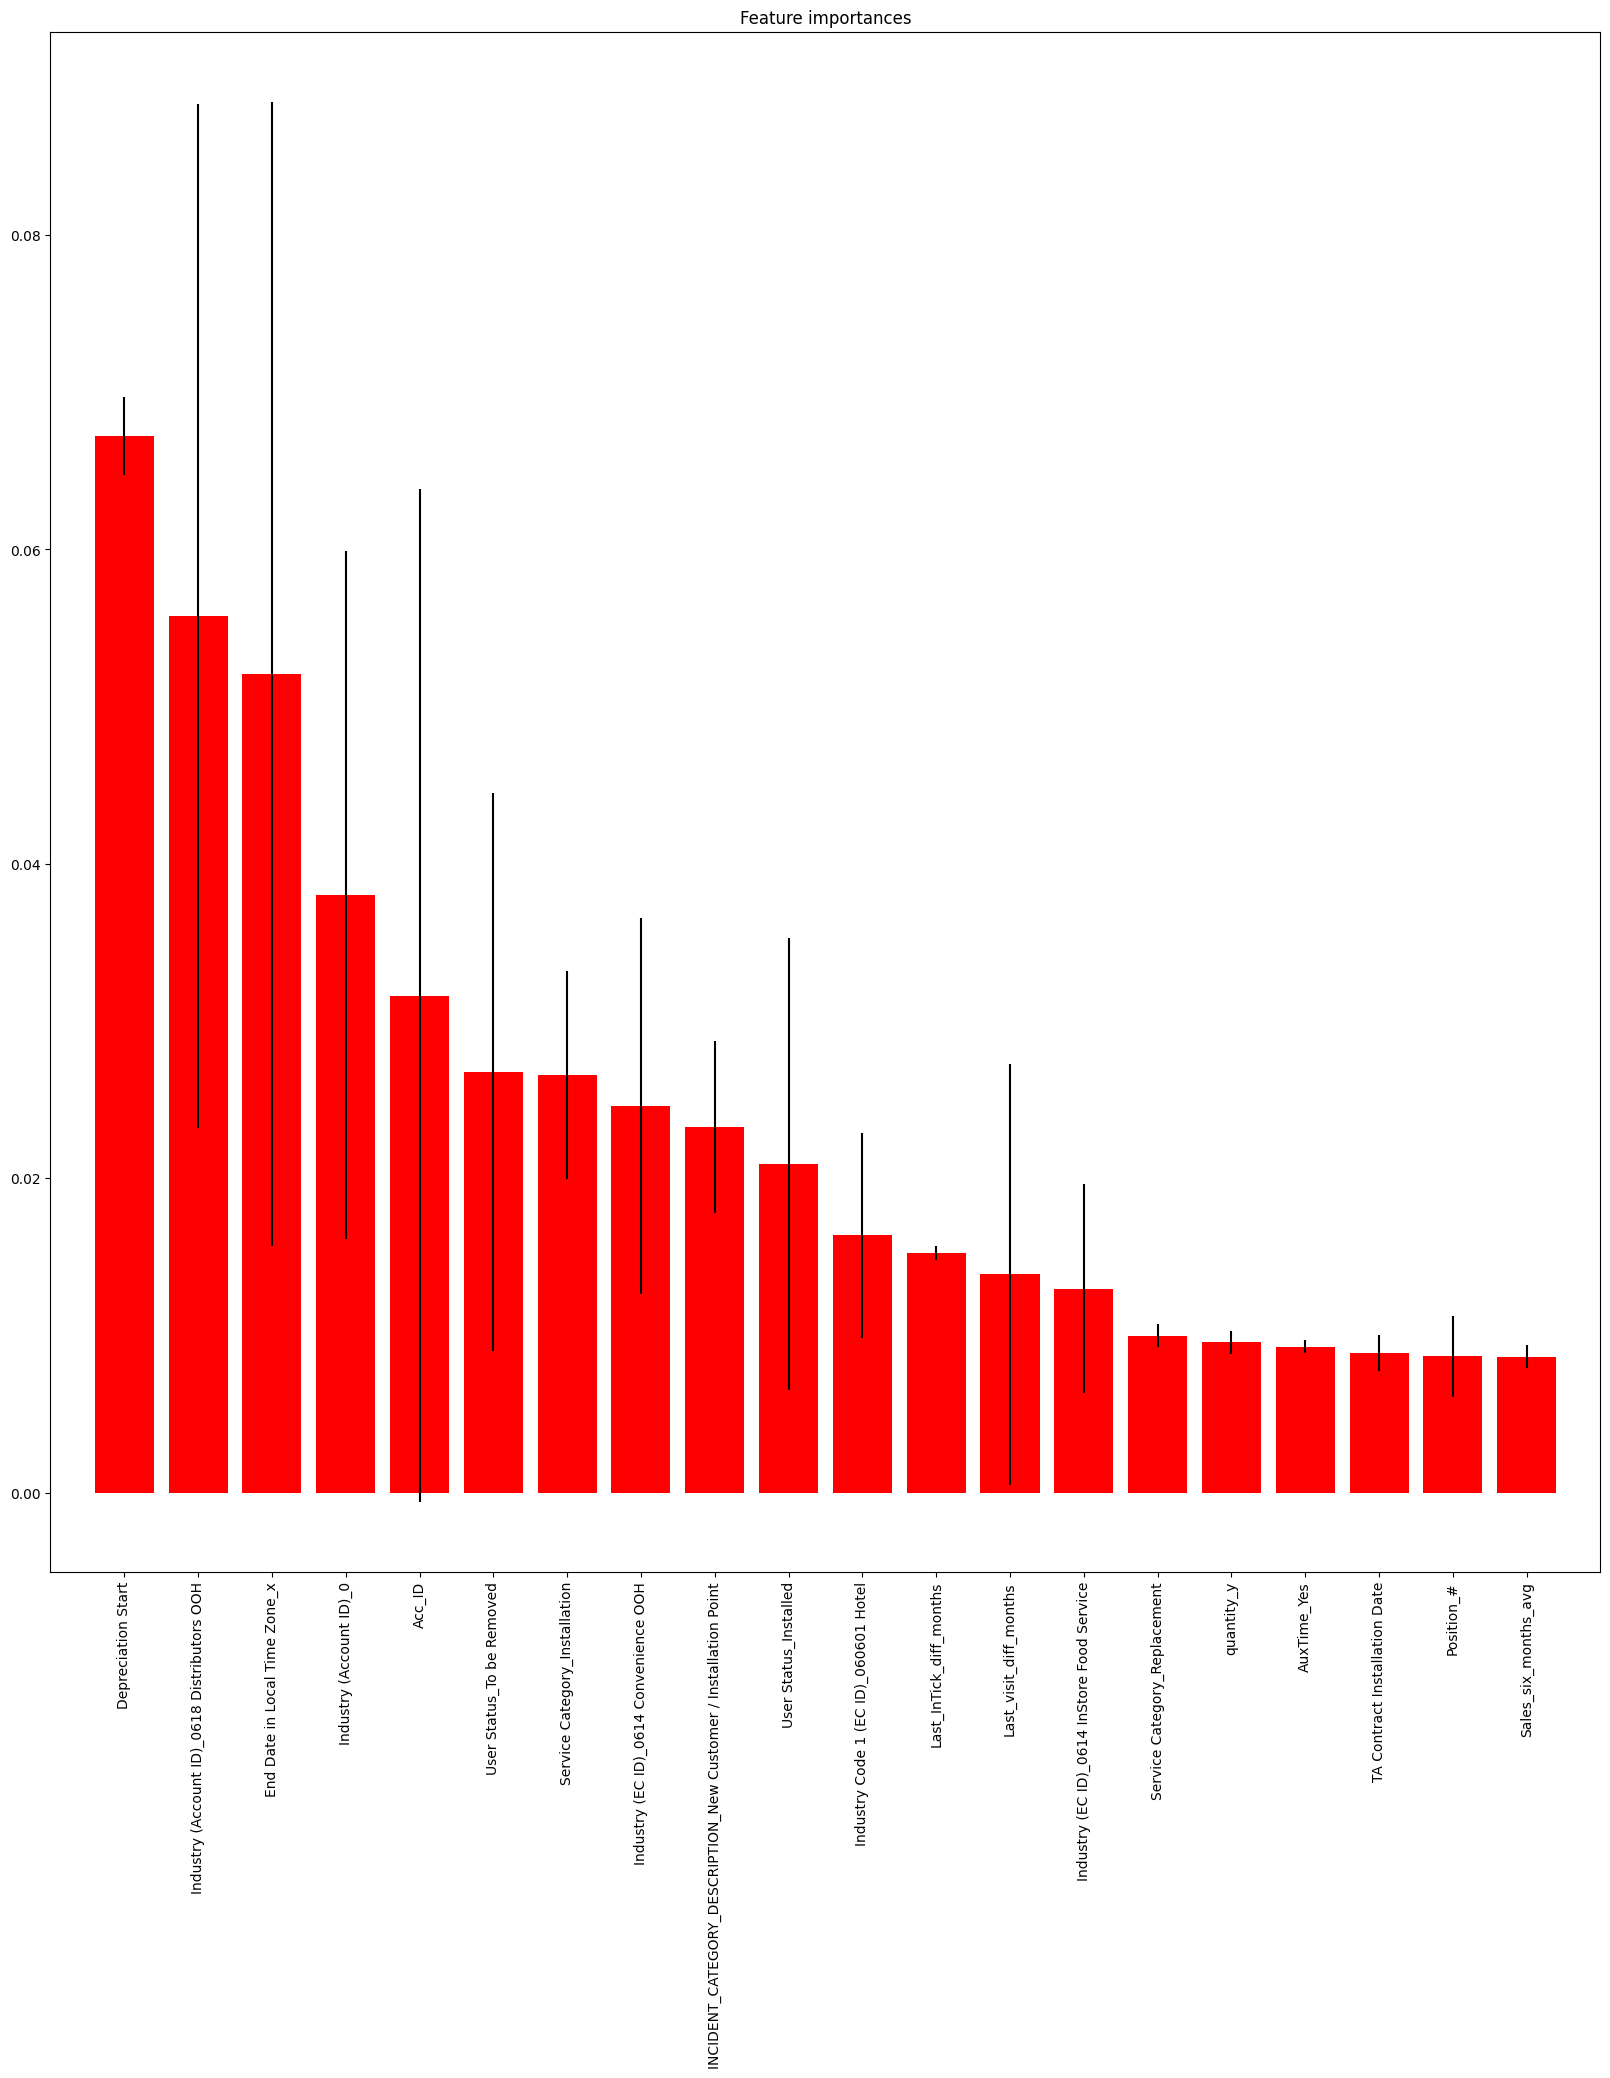

In [45]:
# Plot the impurity-based feature importances of the forest only the top 20 features
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(20), importances[indices][0:20],
        color="r", yerr=std[indices][0:20], align="center")
plt.xticks(range(20), ColumnFeatures[indices[0:20]],rotation=90)
plt.xlim([-1, 20])
plt.show()

The red bars are the impurity-based feature importances of the forest, along with their inter-trees variability.

The inter-trees variability :
"Each individual tree has its own feature importances, and the forest's feature importances are averaged over all trees. But just like you can average over points to find the mean and use the sum of squares to find the variance (basic Gaussian statistics), you can also average over the tree importances to find their mean (the forest feature importances) and use the sum of squares to find their variance." Source :https://www.reddit.com/r/MachineLearning/comments/3i0xny/when_using_forests_of_trees_to_evaluate_the/

Depreciation Start is an important feature, which is not surprising as it reflects the age of a machine.

The feature Depreciation Start might not be the most important feature because the categorical features have been splitted in several one-hot features.

The plot gives an idea of which features are important on predicting the Target variable.

### Limitations

Whether “the importance of features” really reflects the real importance of features is open to debate.